# 第4章: 言語解析

問題30から問題35までは、以下の文章`text`（太宰治の『走れメロス』の冒頭部分）に対して、言語解析を実施せよ。問題36から問題39までは、国家を説明した文書群（日本語版ウィキペディア記事から抽出したテキスト群）をコーパスとして、言語解析を実施せよ。

In [18]:
text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

!pip install mecab-python3

!pip install ipadic

!pip install spacy
!pip install -U ja_ginza

## 30. 動詞
文章`text`に含まれる動詞をすべて表示せよ。

In [25]:
import MeCab
import ipadic

mecab=MeCab.Tagger(ipadic.MECAB_ARGS)
node=mecab.parseToNode(text)
while node:
  if node.feature.split(",")[0]=="動詞":
    print(node.surface)
  node=node.next

し
除か
なら
し
わから
吹き
遊ん
暮し
来


## 31. 動詞の原型
文章`text`に含まれる動詞と、その原型をすべて表示せよ。

In [24]:
mecab=MeCab.Tagger(ipadic.MECAB_ARGS)
node=mecab.parseToNode(text)
while node:
  f=node.feature.split(",")
  if f[0]=="動詞":
    print(f"動詞:{node.surface}\t原型:{f[6]}")
  node=node.next

動詞:し	原型:する
動詞:除か	原型:除く
動詞:なら	原型:なる
動詞:し	原型:する
動詞:わから	原型:わかる
動詞:吹き	原型:吹く
動詞:遊ん	原型:遊ぶ
動詞:暮し	原型:暮す
動詞:来	原型:来る


## 32. 「AのB」
文章`text`において、2つの名詞が「の」で連結されている名詞句をすべて抽出せよ。

In [23]:
mecab=MeCab.Tagger(ipadic.MECAB_ARGS)
node=mecab.parseToNode(text)
token=[]
while node:
  f=node.feature.split(",")
  token.append((node.surface,f[0]))
  node=node.next

for i in range(len(token)-2):
  if token[i][1]=="名詞" and token[i+1][0]=="の" and token[i+2][1]=="名詞":
    print(token[i][0]+token[i+1][0]+token[i+2][0])

暴虐の王
村の牧人


## 33. 係り受け解析

文章`text`に係り受け解析を適用し、係り元と係り先のトークン（形態素や文節などの単位）をタブ区切り形式ですべて抽出せよ。

In [ ]:
import ginza
import spacy

nlp = spacy.load("ja_ginza")
doc = nlp(text)
for token in doc:
  print(f"係り元:{token.text}\t係り先:{token.head.text}")

係り元:
	係り先:メロス
係り元:メロス	係り先:激怒
係り元:は	係り先:メロス
係り元:激怒	係り先:激怒
係り元:し	係り先:激怒
係り元:た	係り先:激怒
係り元:。	係り先:激怒
係り元:
	係り先:

係り元:必ず	係り先:除か
係り元:、	係り先:必ず
係り元:かの	係り先:暴虐
係り元:邪智	係り先:暴虐
係り元:暴虐	係り先:王
係り元:の	係り先:暴虐
係り元:王	係り先:除か
係り元:を	係り先:王
係り元:除か	係り先:決意
係り元:なけれ	係り先:除か
係り元:ば	係り先:なけれ
係り元:なら	係り先:なけれ
係り元:ぬ	係り先:なけれ
係り元:と	係り先:除か
係り元:決意	係り先:決意
係り元:し	係り先:決意
係り元:た	係り先:決意
係り元:。	係り先:決意
係り元:
	係り先:メロス
係り元:メロス	係り先:わから
係り元:に	係り先:メロス
係り元:は	係り先:メロス
係り元:政治	係り先:わから
係り元:が	係り先:政治
係り元:わから	係り先:わから
係り元:ぬ	係り先:わから
係り元:。	係り先:わから
係り元:
	係り先:メロス
係り元:メロス	係り先:牧人
係り元:は	係り先:メロス
係り元:、	係り先:メロス
係り元:村	係り先:牧人
係り元:の	係り先:村
係り元:牧人	係り先:牧人
係り元:で	係り先:牧人
係り元:ある	係り先:で
係り元:。	係り先:牧人
係り元:
	係り先:笛
係り元:笛	係り先:吹き
係り元:を	係り先:笛
係り元:吹き	係り先:暮し
係り元:、	係り先:吹き
係り元:羊	係り先:遊ん
係り元:と	係り先:羊
係り元:遊ん	係り先:暮し
係り元:で	係り先:遊ん
係り元:暮し	係り先:暮し
係り元:て	係り先:暮し
係り元:来	係り先:て
係り元:た	係り先:暮し
係り元:。	係り先:暮し
係り元:
	係り先:邪悪
係り元:けれど	係り先:

係り元:も	係り先:

係り元:邪悪	係り先:敏感
係り元:に	係り先:邪悪
係り元:対し	係り先:に
係り元:ては	係り先:に
係り元:、	係り先:邪悪
係り元:人	係り先:倍
係り元:一	係り先:倍
係り元:倍	係り先:敏感
係り元:に	係り先:倍
係り元:敏感	係り先:敏感
係り元:で	係り先:敏感
係り元:あっ	係り先:で
係り元:た	係り

## 34. 主述の関係
文章`text`において、「メロス」が主語であるときの述語を抽出せよ。

In [ ]:
nlp = spacy.load("ja_ginza")
doc = nlp(text)
for token in doc:
  if token.dep_=="nsubj" and token.text=="メロス":
    print(f"主語:{token.text}\t述語:{token.head.text}")

主語:メロス	述語:激怒
主語:メロス	述語:牧人


## 35. 係り受け木
「メロスは激怒した。」の係り受け木を可視化せよ。

In [ ]:
from spacy import displacy

nlp = spacy.load("ja_ginza")
doc = nlp("メロスは激怒した。")
displacy.render(doc,style="dep",jupyter=True)

## 36. 単語の出現頻度

問題36から39までは、Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](/data/jawiki-country.json.gz)をコーパスと見なし、統計的な分析を行う。

* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに、記事本文が"text"キーの辞書オブジェクトに格納され、そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される

まず、第3章の処理内容を参考に、Wikipedia記事からマークアップを除去し、各記事のテキストを抽出せよ。そして、コーパスにおける単語（形態素）の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [52]:
import json
import re
from collections import Counter

with open("jawiki-country.json")as f:
  word=[]
  for i in f:
    data=json.loads(i)
    text=data["text"]

    text=re.sub(r"\'{2,5}","",text)
    text=re.sub(r"\[\[|\]\]","",text)
    text=re.sub(r"<br>|<ref>|<ref/>|</ref>|<br/>|<br />|\s/>","",text)

    mecab=MeCab.Tagger(ipadic.MECAB_ARGS)
    node=mecab.parseToNode(text)

    while node:
      a=node.feature.split(",")
      word.append(node.surface)
      node=node.next

  count=Counter(word)
  for word,word_count in count.most_common(20):
    print(f"{word}:{word_count}")

|:98998
の:97953
、:85467
は:52377
に:50255
。:48806
=:45157
が:44541
.:41192
を:39317
た:35600
で:34468
年:30199
-:29344
/:29247
と:28369
て:26025
し:25590
{{:17439
）:17364


## 37. 名詞の出現頻度
コーパスにおける名詞の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [51]:
with open("jawiki-country.json")as f:
  word=[]
  for i in f:
    data=json.loads(i)
    text=data["text"]

    text=re.sub(r"\'{2,5}","",text)
    text=re.sub(r"\[\[|\]\]","",text)
    text=re.sub(r"<br>|<ref>|<ref/>|</ref>|<br/>|<br />|\s/>","",text)

    mecab=MeCab.Tagger(ipadic.MECAB_ARGS)
    node=mecab.parseToNode(text)

    while node:
      a=node.feature.split(",")
      if a[0]=="名詞":
        word.append(node.surface)
      node=node.next

  count=Counter(word)
  for word,word_count in count.most_common(20):
    print(f"{word}:{word_count}")

年:30199
月:13700
1:10720
日:10517
人:10142
2:9636
国:9072
en:7246
www:6142
3:6019
語:5873
http:5699
的:5258
4:5016
世界:4818
5:4644
こと:4642
of:4638
リンク:4414
ref:4413


## 38. TF・IDF
日本に関する記事における名詞のTF・IDFスコアを求め、TF・IDFスコア上位20語とそのTF, IDF, TF・IDFを表示せよ。

In [57]:
with open("jawiki-country.json")as f:
  word=[]
  for i in f:
    data=json.loads(i)
    if data["title"]=="日本":
      text=data["text"]

  text=re.sub(r"\'{2,5}","",text)
  text=re.sub(r"\[\[|\]\]","",text)
  text=re.sub(r"<br>|<ref>|<ref/>|</ref>|<br/>|<br />|\s/>","",text)

  mecab=MeCab.Tagger(ipadic.MECAB_ARGS)
  node=mecab.parseToNode(text)

  all=0
  while node:
    a=node.feature.split(",")
    if a[0]=="名詞":
      word.append(node.surface)
      all+=1
    node=node.next

  count=Counter(word)
  idf=1

  for word,word_count in count.most_common(20):
    print(f"単語:{word}\tTF:{word_count/all}\tIDF:{idf}\tTF-IDF:{word_count/all*idf}")

単語:日本	TF:0.022560179565287098	IDF:1	TF-IDF:0.022560179565287098
単語:年	TF:0.01992624997137033	IDF:1	TF-IDF:0.01992624997137033
単語:日	TF:0.00792469251734958	IDF:1	TF-IDF:0.00792469251734958
単語:月	TF:0.007718558896956094	IDF:1	TF-IDF:0.007718558896956094
単語:2	TF:0.007649847690158265	IDF:1	TF-IDF:0.007649847690158265
単語:E	TF:0.0064130459677973475	IDF:1	TF-IDF:0.0064130459677973475
単語:国	TF:0.006344334760999519	IDF:1	TF-IDF:0.006344334760999519
単語:3	TF:0.006298527289800966	IDF:1	TF-IDF:0.006298527289800966
単語:1	TF:0.00554270401502485	IDF:1	TF-IDF:0.00554270401502485
単語:的	TF:0.005290762923432812	IDF:1	TF-IDF:0.005290762923432812
単語:https	TF:0.005038821831840773	IDF:1	TF-IDF:0.005038821831840773
単語:jp	TF:0.005038821831840773	IDF:1	TF-IDF:0.005038821831840773
単語:px	TF:0.00469526579785163	IDF:1	TF-IDF:0.00469526579785163
単語:web	TF:0.004443324706259591	IDF:1	TF-IDF:0.004443324706259591
単語:www	TF:0.0043975172350610384	IDF:1	TF-IDF:0.0043975172350610384
単語:県	TF:0.004374613499461762	IDF:1	TF-IDF:0.0043

## 39. Zipfの法則
コーパスにおける単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ。

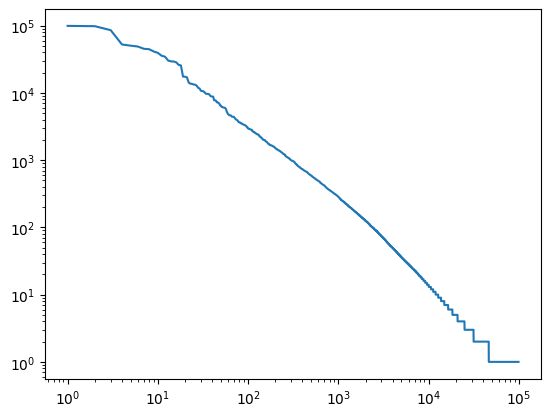

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import math

with open("jawiki-country.json")as f:
  word=[]
  for i in f:
    data=json.loads(i)
    text=data["text"]

    text=re.sub(r"\'{2,5}","",text)
    text=re.sub(r"\[\[|\]\]","",text)
    text=re.sub(r"<br>|<ref>|<ref/>|</ref>|<br/>|<br />|\s/>","",text)

    mecab=MeCab.Tagger(ipadic.MECAB_ARGS)
    node=mecab.parseToNode(text)

    while node:
      a=node.feature.split(",")
      word.append(node.surface)
      node=node.next

  count=Counter(word)
  rev_count=sorted(count.items(),key=lambda x:x[1],reverse=True)
  x=np.arange(1,len(rev_count)+1)
  y=[word_count for word,word_count in rev_count]
  plt.loglog(x,y)
  plt.show()